# Regression Analysis on News Documents
In this notebook, we include all the regression analysis we did using the output of Coh-metrix on a collection of fake and real news documents.

In [30]:
# reading the excel file which includes all the information
library("readxl")
my_data <- read_excel("data/FakeNewsNet/old/processed/fakenewsnet_full_un.xlsx")
head(my_data)

X__1,DESPC,DESSC,DESWC,DESPL,DESPLd,DESSL,DESSLd,DESWLsy,DESWLsyd,⋯,WRDHYPv,WRDHYPnv,RDFRE,RDFKGL,RDL2,label,checker,total_shares,shares,id
0,27,83,1714,3.074,1.920,21.036,9.954,1.510,0.869,⋯,1.504,1.710,58.128,10.282,12.778,0,1,1.612784,1.579784,100
1,8,14,263,1.750,1.165,19.286,12.437,1.578,0.957,⋯,1.561,1.608,54.268,10.357,18.416,0,1,1.806180,1.716003,101
2,8,13,247,1.625,1.061,19.231,12.112,1.490,0.821,⋯,1.897,1.801,61.496,9.402,9.294,0,1,1.301030,1.278754,102
3,4,7,119,1.750,0.500,17.143,6.986,1.706,0.995,⋯,1.926,2.151,45.252,11.171,13.503,0,1,1.973128,1.924279,103
4,10,22,432,2.200,1.751,19.955,15.671,1.688,0.920,⋯,1.718,2.274,44.100,11.986,11.865,0,1,1.477121,1.462398,104
5,8,11,235,1.375,0.518,21.818,12.123,1.668,0.983,⋯,2.105,2.560,44.038,12.424,5.850,0,1,2.453318,2.437751,105


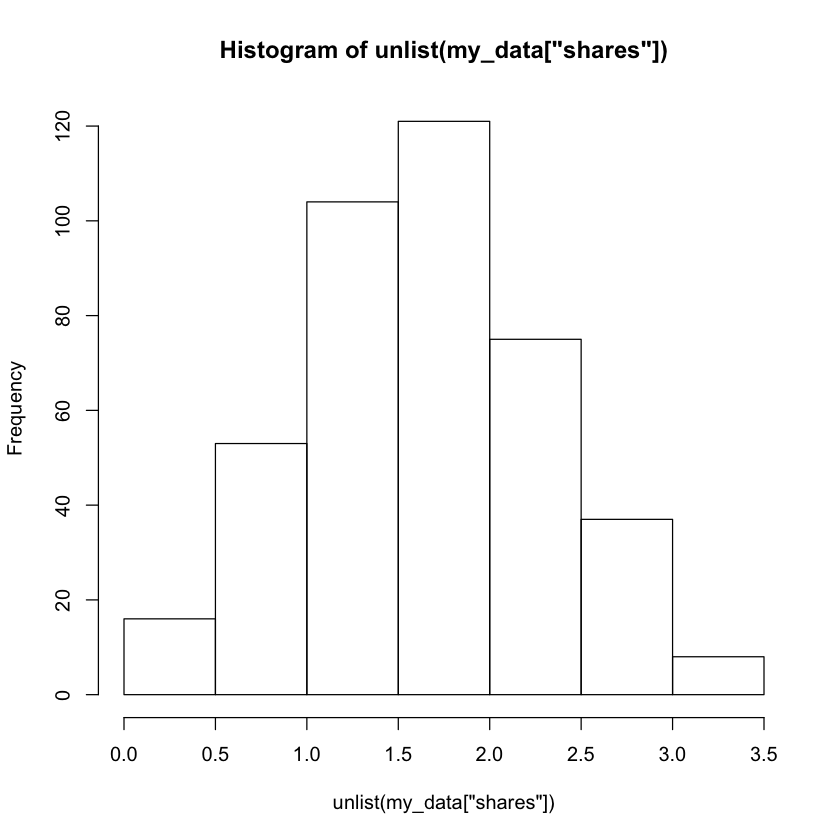

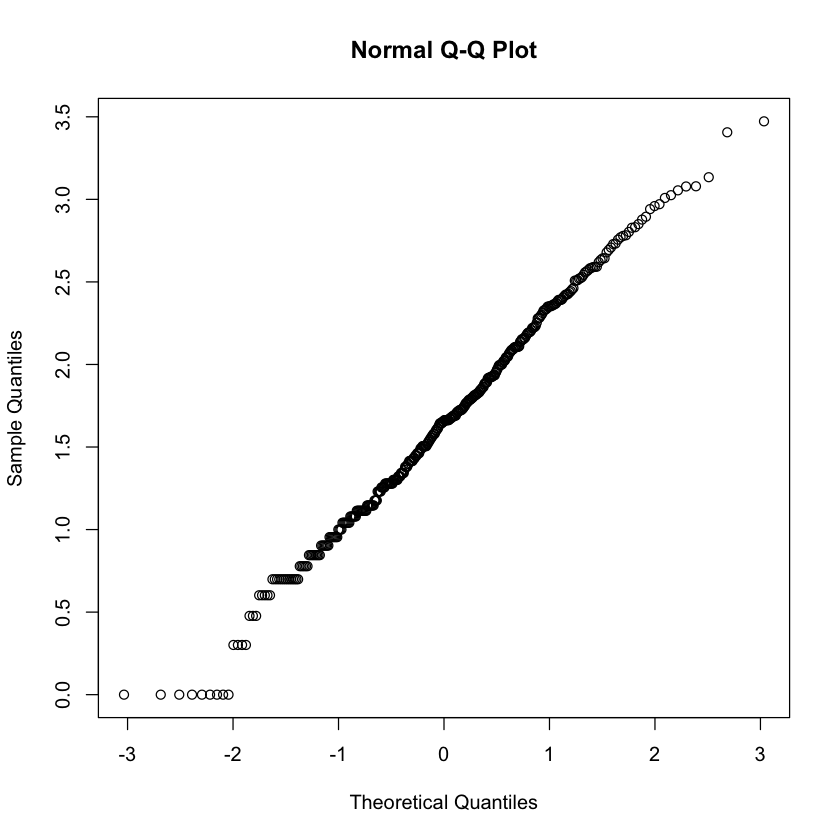

In [31]:
# plotting the normal distribution and probability plot
hist(unlist(my_data["shares"]))
qqnorm(unlist(my_data["shares"]))

## Principal Component Analysis (PCA)
In this section, we first run a PCA on all the indexes we have from the Coh-metrix to account for multicollinearity. Then, using the scores from the PCA model, truth labels, and source of fact checking, we run a linear regression analysis to find the significant components in predicting the number of shares.

In [32]:
# Principal Component Analysis (PCA)
# ----------------------------------
# to install the "psych" package, uncomment the two following lines:
# options(download.file.method = "wget")
# install.packages("psych")
library("psych")

# dropping the columns that we do not want in the PCA.
drops <- c("X__1", "id", "label", "shares", "total_shares", "checker")
x <- my_data[, !(names(my_data) %in% c(drops))]
y <- my_data["shares"]

truth_labels <- my_data["label"]
source <- my_data["checker"]

# printing eigenvalues if we want to find the number of components for PCA
# print(eigen(cor(x)))

dim(x)

pca <- psych::principal(x, nfactors=108, rotate="varimax")

# if we want to print the loadings in the output
# print(pca$loadings, cutoff = 0.4, sort = TRUE)

vars = as.matrix(pca$scores)

# writing the loading values in a csv file
write.csv(pca$loadings,'loadings.csv')

[1] 414 108

# Multiple Linear Regression

In [34]:
# linear regression using the PCA scores for predicting the number of shares
lin_model <- lm(unlist(y) ~ pca$scores + as.matrix(truth_labels) + as.matrix(source))
summary(lin_model)

# if we want the coefficients in a csv file.
# library(broom)
# write.csv(tidy(lin_model) , "coefs.csv")


Call:
lm(formula = unlist(y) ~ pca$scores + as.matrix(truth_labels) + 
    as.matrix(source))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68431 -0.35294 -0.01604  0.36580  1.58934 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.5210545  0.1272514  11.953  < 2e-16 ***
pca$scoresRC1           -0.0355705  0.0308071  -1.155 0.249155    
pca$scoresRC2            0.0882807  0.0309207   2.855 0.004600 ** 
pca$scoresRC6           -0.0283907  0.0312256  -0.909 0.363960    
pca$scoresRC5           -0.0286374  0.0308650  -0.928 0.354235    
pca$scoresRC4           -0.0470918  0.0304090  -1.549 0.122518    
pca$scoresRC7            0.0761135  0.0315811   2.410 0.016544 *  
pca$scoresRC9           -0.0144191  0.0307706  -0.469 0.639692    
pca$scoresRC3           -0.0390608  0.0306524  -1.274 0.203529    
pca$scoresRC41           0.0472023  0.0305565   1.545 0.123450    
pca$scoresRC29           0.0061604  0.0305593   0

In [15]:
# stepwise backwards eliminaton linear regression using the PCA scores
lin_model2 <- step(lm(unlist(y) ~ . + as.matrix(truth_labels)+as.matrix(source),data=as.data.frame(pca$scores)),direction="backward")
summary(lin_model2)

Start:  AIC=-305.9
unlist(y) ~ RC1 + RC2 + RC6 + RC5 + RC4 + RC7 + RC9 + RC3 + RC41 + 
    RC29 + RC15 + RC63 + RC49 + RC17 + RC54 + RC26 + RC10 + RC16 + 
    RC8 + RC13 + RC47 + RC27 + RC12 + RC37 + RC30 + RC42 + RC59 + 
    RC40 + RC20 + RC24 + RC21 + RC23 + RC11 + RC28 + RC31 + RC38 + 
    RC19 + RC33 + RC35 + RC14 + RC89 + RC18 + RC32 + RC36 + RC43 + 
    RC57 + RC34 + RC61 + RC48 + RC46 + RC52 + RC60 + RC55 + RC85 + 
    RC39 + RC53 + RC73 + RC51 + RC56 + RC45 + RC93 + RC58 + RC44 + 
    RC50 + RC74 + RC83 + RC66 + RC77 + RC22 + RC64 + RC65 + RC71 + 
    RC95 + RC78 + RC25 + RC70 + RC80 + RC75 + RC69 + RC72 + RC81 + 
    RC79 + RC76 + RC67 + RC87 + RC84 + RC94 + RC86 + RC90 + RC91 + 
    RC92 + RC68 + RC88 + RC97 + RC82 + RC62 + RC96 + RC98 + RC99 + 
    RC100 + RC101 + RC102 + RC103 + RC105 + RC104 + RC106 + RC107 + 
    RC108 + as.matrix(truth_labels) + as.matrix(source)

                          Df Sum of Sq    RSS     AIC
- RC18                     1    0.0001 115.67 -307.89



Call:
lm(formula = unlist(y) ~ RC2 + RC4 + RC7 + RC3 + RC41 + RC17 + 
    RC16 + RC47 + RC37 + RC30 + RC20 + RC24 + RC11 + RC31 + RC14 + 
    RC43 + RC52 + RC39 + RC56 + RC58 + RC66 + RC25 + RC72 + RC94 + 
    RC98 + RC100 + RC102 + RC103 + RC104 + as.matrix(truth_labels), 
    data = as.data.frame(pca$scores))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66367 -0.39469 -0.03246  0.37384  1.90409 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.50890    0.04194  35.980  < 2e-16 ***
RC2                      0.08442    0.02888   2.923 0.003670 ** 
RC4                     -0.04671    0.02864  -1.631 0.103778    
RC7                      0.07079    0.02923   2.422 0.015915 *  
RC3                     -0.04171    0.02876  -1.451 0.147726    
RC41                     0.04646    0.02869   1.619 0.106168    
RC17                    -0.04288    0.02878  -1.490 0.137121    
RC16                    -0.08972    0.02878  -3

In [1]:
# linear regression using the PCA scores but no truth label
lin_model_notruth <- lm(unlist(y) ~ pca$scores+as.matrix(source) )
summary(lin_model_notruth)

ERROR: Error in unlist(y): object 'y' not found


In [8]:
# stepwise backwards eliminaton linear regression using the PCA scores but no truth label
lin_model2_notruth <- step(lm(unlist(y) ~ . ,data=as.data.frame(pca$scores)+as.matrix(source)),direction="backward")
summary(lin_model2_notruth)

Start:  AIC=-293.16
unlist(y) ~ RC1 + RC2 + RC6 + RC5 + RC4 + RC7 + RC9 + RC31 + 
    RC12 + RC20 + RC15 + RC16 + RC17 + RC69 + RC10 + RC44 + RC70 + 
    RC42 + RC13 + RC25 + RC39 + RC37 + RC8 + RC30 + RC22 + RC89 + 
    RC40 + RC46 + RC11 + RC24 + RC23 + RC21 + RC27 + RC38 + RC29 + 
    RC35 + RC19 + RC32 + RC14 + RC18 + RC88 + RC33 + RC26 + RC36 + 
    RC43 + RC34 + RC57 + RC50 + RC48 + RC45 + RC52 + RC59 + RC55 + 
    RC82 + RC53 + RC3 + RC62 + RC90 + RC41 + RC65 + RC54 + RC58 + 
    RC49 + RC60 + RC73 + RC68 + RC51 + RC28 + RC63 + RC71 + RC77 + 
    RC64 + RC72 + RC47 + RC74 + RC79 + RC61 + RC78 + RC76 + RC95 + 
    RC85 + RC75 + RC80 + RC83 + RC84 + RC86 + RC92 + RC87 + RC93 + 
    RC67 + RC94 + RC56 + RC66 + RC96 + RC81 + RC91 + RC97 + RC98 + 
    RC99 + RC100 + RC102 + RC101 + RC104 + RC103 + RC105 + RC106 + 
    RC107

        Df Sum of Sq    RSS     AIC
- RC69   1    0.0000 121.03 -295.16
- RC67   1    0.0000 121.03 -295.16
- RC80   1    0.0001 121.03 -295.16
- RC9    1    0.0


Call:
lm(formula = unlist(y) ~ RC2 + RC4 + RC7 + RC31 + RC12 + RC70 + 
    RC25 + RC30 + RC46 + RC11 + RC24 + RC29 + RC14 + RC36 + RC52 + 
    RC59 + RC82 + RC53 + RC3 + RC41 + RC58 + RC51 + RC71 + RC47 + 
    RC76 + RC86 + RC93 + RC97 + RC99 + RC102 + RC101 + RC103, 
    data = as.data.frame(pca$scores) + as.matrix(source))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49434 -0.39328 -0.03177  0.39692  1.93339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.70983    0.09314  18.358  < 2e-16 ***
RC2          0.07506    0.02857   2.627 0.008955 ** 
RC4         -0.04163    0.02865  -1.453 0.146978    
RC7          0.04947    0.02861   1.729 0.084623 .  
RC31        -0.04847    0.02859  -1.696 0.090791 .  
RC12         0.04282    0.02876   1.489 0.137292    
RC70        -0.07447    0.02868  -2.596 0.009790 ** 
RC25        -0.06590    0.02862  -2.302 0.021851 *  
RC30         0.07885    0.02863   2.754 0.006167 ** 
RC46         0.05350   

### Analysis of Variance for truth labels using PCA scores

In [2]:
aov_model <- aov(as.matrix(truth_labels) ~ ., data=as.data.frame(pca$scores))
summary(aov_model)

ERROR: Error in as.data.frame(pca$scores): object 'pca' not found


### Stepwise backward elimination Analysis of Variance for truth labels using PCA scores

In [37]:
# stepwise backwards eliminaton linear regression using the PCA scores but no truth label
aov_model2 <- step(aov(as.matrix(truth_labels) ~ . +as.matrix(source),data=as.data.frame(pca$scores)),direction="backward")
summary(aov_model2)


library(broom)
write.csv(tidy(aov_model2) , "coefs_truth.csv")

Start:  AIC=-691.82
as.matrix(truth_labels) ~ RC1 + RC2 + RC6 + RC5 + RC4 + RC7 + 
    RC9 + RC3 + RC41 + RC29 + RC15 + RC63 + RC49 + RC17 + RC54 + 
    RC26 + RC10 + RC16 + RC8 + RC13 + RC47 + RC27 + RC12 + RC37 + 
    RC30 + RC42 + RC59 + RC40 + RC20 + RC24 + RC21 + RC23 + RC11 + 
    RC28 + RC31 + RC38 + RC19 + RC33 + RC35 + RC14 + RC89 + RC18 + 
    RC32 + RC36 + RC43 + RC57 + RC34 + RC61 + RC48 + RC46 + RC52 + 
    RC60 + RC55 + RC85 + RC39 + RC53 + RC73 + RC51 + RC56 + RC45 + 
    RC93 + RC58 + RC44 + RC50 + RC74 + RC83 + RC66 + RC77 + RC22 + 
    RC64 + RC65 + RC71 + RC95 + RC78 + RC25 + RC70 + RC80 + RC75 + 
    RC69 + RC72 + RC81 + RC79 + RC76 + RC67 + RC87 + RC84 + RC94 + 
    RC86 + RC90 + RC91 + RC92 + RC68 + RC88 + RC97 + RC82 + RC62 + 
    RC96 + RC98 + RC99 + RC100 + RC101 + RC102 + RC103 + RC105 + 
    RC104 + RC106 + RC107 + RC108 + as.matrix(source)

                    Df Sum of Sq    RSS     AIC
- RC56               1    0.0000 45.760 -693.82
- RC88               1 

             Df Sum Sq Mean Sq F value   Pr(>F)    
RC1           1   1.09   1.093   8.054 0.004798 ** 
RC2           1   1.46   1.456  10.727 0.001159 ** 
RC5           1   1.05   1.054   7.766 0.005606 ** 
RC7           1   3.61   3.613  26.615 4.12e-07 ***
RC9           1   0.55   0.554   4.078 0.044200 *  
RC3           1   0.71   0.708   5.216 0.022969 *  
RC41          1   0.27   0.268   1.977 0.160533    
RC29          1   0.47   0.467   3.440 0.064473 .  
RC15          1   0.89   0.889   6.548 0.010908 *  
RC17          1   0.87   0.870   6.410 0.011771 *  
RC26          1   0.50   0.503   3.705 0.055040 .  
RC10          1   0.45   0.454   3.342 0.068375 .  
RC16          1   0.85   0.848   6.245 0.012899 *  
RC8           1   1.75   1.748  12.879 0.000379 ***
RC27          1   2.21   2.207  16.256 6.76e-05 ***
RC12          1   5.71   5.710  42.066 2.93e-10 ***
RC37          1   1.65   1.654  12.184 0.000542 ***
RC30          1   0.60   0.602   4.436 0.035892 *  
RC24        